# Importing Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

C:\Users\SHOLAY\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
pd.set_option("display.max_columns", 100)
pd.set_option("display.max_rows", 100)

# Loading the dataset and exploring/overview

In [3]:
data= pd.read_excel("Week2_challenge_data_source.xlsx")
data.head()

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps),TCP DL Retrans. Vol (Bytes),TCP UL Retrans. Vol (Bytes),DL TP < 50 Kbps (%),50 Kbps < DL TP < 250 Kbps (%),250 Kbps < DL TP < 1 Mbps (%),DL TP > 1 Mbps (%),UL TP < 10 Kbps (%),10 Kbps < UL TP < 50 Kbps (%),50 Kbps < UL TP < 300 Kbps (%),UL TP > 300 Kbps (%),HTTP DL (Bytes),HTTP UL (Bytes),Activity Duration DL (ms),Activity Duration UL (ms),Dur. (ms)2,Handset Manufacturer,Handset Type,Nb of sec with 125000B < Vol DL,Nb of sec with 1250B < Vol UL < 6250B,Nb of sec with 31250B < Vol DL < 125000B,Nb of sec with 37500B < Vol UL,Nb of sec with 6250B < Vol DL < 31250B,Nb of sec with 6250B < Vol UL < 37500B,Nb of sec with Vol DL < 6250B,Nb of sec with Vol UL < 1250B,Social Media DL (Bytes),Social Media UL (Bytes),Google DL (Bytes),Google UL (Bytes),Email DL (Bytes),Email UL (Bytes),Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,13114483460844900352,2019-04-04 12:01:18,770.0,2019-04-25 14:35:31,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9164566995485190,42.0,5.0,23.0,44.0,NaN,NaN,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,NaN,NaN,37624.0,38787.0,1.823653e+09,Samsung,Samsung Galaxy A5 Sm-A520F,NaN,NaN,NaN,NaN,NaN,NaN,213.0,214.0,1545765.0,24420.0,1634479.0,1271433.0,3563542.0,137762.0,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,13114483482878900224,2019-04-09 13:04:04,235.0,2019-04-25 08:15:48,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,65.0,5.0,16.0,26.0,NaN,NaN,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,NaN,NaN,168.0,3560.0,1.365104e+09,Samsung,Samsung Galaxy J5 (Sm-J530),NaN,NaN,NaN,NaN,NaN,NaN,971.0,1022.0,1926113.0,7165.0,3493924.0,920172.0,629046.0,308339.0,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0
2,13114483484080500736,2019-04-09 17:42:11,1.0,2019-04-25 11:58:13,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,NaN,NaN,6.0,9.0,NaN,NaN,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,1.361763e+09,Samsung,Samsung Galaxy A8 (2018),NaN,NaN,NaN,NaN,NaN,NaN,751.0,695.0,1684053.0,42224.0,8535055.0,1694064.0,2690151.0,672973.0,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0
3,13114483485442799616,2019-04-10 00:31:25,486.0,2019-04-25 07:36:35,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,NaN,NaN,44.0,44.0,NaN,NaN,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,NaN,NaN,3330.0,37882.0,1.321510e+09,undefined,undefined,NaN,NaN,NaN,NaN,NaN,NaN,17.0,207.0,644121.0,13372.0,9023734.0,2788027.0,1439754.0,631229.0,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0
4,13114483499480700928,2019-04-12 20:10:23,565.0,2019-04-25 10:40:32,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,NaN,NaN,6.0,9.0,NaN,NaN,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,1.089009e+09,Samsung,Samsung Sm-G390F,NaN,NaN,NaN,NaN,NaN,NaN,607.0,604.0,862600.0,50188.0,6248284.0,1500559.0,1936496.0,173853.0,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0


In [4]:
data.tail()

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps),TCP DL Retrans. Vol (Bytes),TCP UL Retrans. Vol (Bytes),DL TP < 50 Kbps (%),50 Kbps < DL TP < 250 Kbps (%),250 Kbps < DL TP < 1 Mbps (%),DL TP > 1 Mbps (%),UL TP < 10 Kbps (%),10 Kbps < UL TP < 50 Kbps (%),50 Kbps < UL TP < 300 Kbps (%),UL TP > 300 Kbps (%),HTTP DL (Bytes),HTTP UL (Bytes),Activity Duration DL (ms),Activity Duration UL (ms),Dur. (ms)2,Handset Manufacturer,Handset Type,Nb of sec with 125000B < Vol DL,Nb of sec with 1250B < Vol UL < 6250B,Nb of sec with 31250B < Vol DL < 125000B,Nb of sec with 37500B < Vol UL,Nb of sec with 6250B < Vol DL < 31250B,Nb of sec with 6250B < Vol UL < 37500B,Nb of sec with Vol DL < 6250B,Nb of sec with Vol UL < 1250B,Social Media DL (Bytes),Social Media UL (Bytes),Google DL (Bytes),Google UL (Bytes),Email DL (Bytes),Email UL (Bytes),Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
149997,7349883264234609664,2019-04-29 07:28:42,483.0,2019-04-30 10:41:33,187.0,97970.0,2.082019e+14,3.366345e+10,3.566051e+13,D10223C,27.0,2.0,23.0,54.0,NaN,NaN,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,NaN,NaN,17264.0,16759.0,97970704.0,Apple,Apple iPhone Se (A1723),NaN,NaN,NaN,NaN,NaN,NaN,105.0,102.0,2.344568e+06,7.613000e+03,2.229420e+06,2.185941e+06,1.954414e+06,1.673040e+05,1.387723e+07,8.288284e+06,1.935015e+07,2.129315e+07,6.268931e+08,4.735033e+06,7.121804e+08,2.457758e+06,39135081.0,6.666488e+08
149998,13114483573367300096,2019-04-29 07:28:43,283.0,2019-04-30 10:46:12,810.0,98249.0,2.082017e+14,3.362189e+10,3.572121e+13,T51102A,43.0,6.0,43.0,47.0,NaN,NaN,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,NaN,NaN,25003.0,28640.0,98249527.0,Apple,Apple iPhone Xs (A2097),NaN,NaN,NaN,NaN,NaN,NaN,104.0,108.0,1.245845e+06,1.439400e+04,3.850890e+06,2.734579e+06,1.525734e+06,5.325430e+05,2.266051e+07,1.855903e+06,9.963942e+06,5.065760e+06,5.535395e+08,1.339432e+07,1.211009e+08,1.131473e+07,34912224.0,5.927864e+08
149999,13114483573367300096,2019-04-29 07:28:43,696.0,2019-04-30 10:40:34,327.0,97910.0,2.082021e+14,3.361962e+10,8.618620e+13,L88342B,37.0,5.0,34.0,37.0,NaN,NaN,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,NaN,NaN,13405.0,34088.0,97910631.0,Huawei,Huawei Fig-Lx1,NaN,NaN,NaN,NaN,NaN,NaN,43.0,82.0,8.015470e+05,2.156200e+04,4.189773e+06,3.567494e+06,2.228270e+06,6.226440e+05,8.817106e+06,8.305402e+06,3.322253e+06,1.317259e+07,3.525370e+08,2.529475e+06,8.147131e+08,1.406930e+06,29626096.0,3.718959e+08
150000,NaN,NaT,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.795322e+06,3.292843e+04,5.750753e+06,2.056542e+06,1.791729e+06,4.673734e+05,1.163407e+07,1.100941e+07,1.162685e+07,1.100175e+07,4.220447e+08,8.288398e+06,4.211005e+08,8.264799e+06,NaN,NaN
150001,Total,NaT,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.056439e+10,1.962499e+08,3.405294e+10,1.211349e+10,1.047520e+10,2.714397e+09,6.831479e+10,6.494299e+10,6.825102e+10,6.515467e+10,2.479600e+12,4.852877e+10,2.472833e+12,4.907724e+10,NaN,2.671258e+12


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150002 entries, 0 to 150001
Data columns (total 55 columns):
 #   Column                                    Non-Null Count   Dtype         
---  ------                                    --------------   -----         
 0   Bearer Id                                 149011 non-null  object        
 1   Start                                     150000 non-null  datetime64[ns]
 2   Start ms                                  150000 non-null  float64       
 3   End                                       150000 non-null  datetime64[ns]
 4   End ms                                    150000 non-null  float64       
 5   Dur. (ms)                                 150000 non-null  float64       
 6   IMSI                                      149431 non-null  float64       
 7   MSISDN/Number                             148935 non-null  float64       
 8   IMEI                                      149429 non-null  float64       
 9   Last Location N

In [6]:
data.shape

(150002, 55)

### Total number of missing values in each columns

In [7]:
data.isna().sum()

Bearer Id                                      991
Start                                            2
Start ms                                         2
End                                              2
End ms                                           2
Dur. (ms)                                        2
IMSI                                           571
MSISDN/Number                                 1067
IMEI                                           573
Last Location Name                            1154
Avg RTT DL (ms)                              27830
Avg RTT UL (ms)                              27813
Avg Bearer TP DL (kbps)                          2
Avg Bearer TP UL (kbps)                          2
TCP DL Retrans. Vol (Bytes)                  88147
TCP UL Retrans. Vol (Bytes)                  96650
DL TP < 50 Kbps (%)                            755
50 Kbps < DL TP < 250 Kbps (%)                 755
250 Kbps < DL TP < 1 Mbps (%)                  755
DL TP > 1 Mbps (%)             

### Statistical summary of the dataset

In [8]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Start ms,150000.0,4.991882e+02,2.886118e+02,0.000000e+00,2.500000e+02,4.990000e+02,7.490000e+02,9.990000e+02
End ms,150000.0,4.988009e+02,2.880977e+02,0.000000e+00,2.510000e+02,5.000000e+02,7.500000e+02,9.990000e+02
Dur. (ms),150000.0,1.046086e+05,8.103762e+04,7.142000e+03,5.744050e+04,8.639900e+04,1.324302e+05,1.859336e+06
IMSI,149431.0,2.082016e+14,2.148809e+10,2.040471e+14,2.082014e+14,2.082015e+14,2.082018e+14,2.140743e+14
MSISDN/Number,148935.0,4.188282e+10,2.447443e+12,3.360100e+10,3.365130e+10,3.366371e+10,3.368349e+10,8.823971e+14
IMEI,149429.0,4.847455e+13,2.241637e+13,4.400152e+11,3.546071e+13,3.572201e+13,8.611970e+13,9.900120e+13
Avg RTT DL (ms),122172.0,1.097957e+02,6.197827e+02,0.000000e+00,3.200000e+01,4.500000e+01,7.000000e+01,9.692300e+04
Avg RTT UL (ms),122189.0,1.766288e+01,8.479352e+01,0.000000e+00,2.000000e+00,5.000000e+00,1.500000e+01,7.120000e+03
Avg Bearer TP DL (kbps),150000.0,1.330005e+04,2.397188e+04,0.000000e+00,4.300000e+01,6.300000e+01,1.971075e+04,3.781600e+05
Avg Bearer TP UL (kbps),150000.0,1.770429e+03,4.625356e+03,0.000000e+00,4.700000e+01,6.300000e+01,1.120000e+03,5.861300e+04


In [9]:
pd.Series(data['Handset Type'].unique())

0                   Samsung Galaxy A5 Sm-A520F
1                  Samsung Galaxy J5 (Sm-J530)
2                     Samsung Galaxy A8 (2018)
3                                    undefined
4                             Samsung Sm-G390F
                         ...                  
1392                                   Lg-K520
1393                 D-Link Corporati. Dwr-953
1394                      Asustek Asus Zb500Kg
1395                 Huawei Mediapad T5 10 Pro
1396    Shenzhen Jeko Co. Blackview Bv5800 Pro
Length: 1397, dtype: object

### Replacing the handset type with ```undefined``` with NA (not available)

In [10]:
data["Handset Type"].replace("undefined", np.nan, inplace= True)

# Task 1.0

## Top 10 Handset used by Customers

* With all the data in place.

In [11]:
data["Handset Type"].value_counts().head(10)

Huawei B528S-23A                19752
Apple iPhone 6S (A1688)          9419
Apple iPhone 6 (A1586)           9023
Apple iPhone 7 (A1778)           6326
Apple iPhone Se (A1723)          5187
Apple iPhone 8 (A1905)           4993
Apple iPhone Xr (A2105)          4568
Samsung Galaxy S8 (Sm-G950F)     4520
Apple iPhone X (A1901)           3813
Samsung Galaxy A5 Sm-A520F       3724
Name: Handset Type, dtype: int64

Text(0.5, 1.0, 'Top 10 Handset Used by Customers')

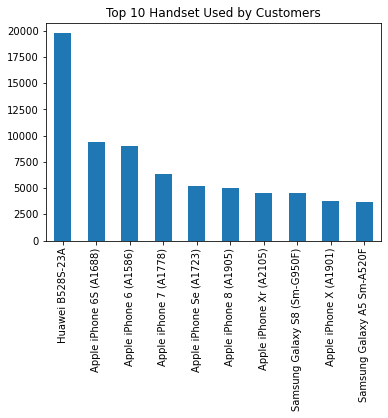

In [12]:
data["Handset Type"].value_counts().head(10).plot(kind= "bar").set_title("Top 10 Handset Used by Customers")

* By dropping the missing data in the dataset will affect the data a lot.*

In [13]:
data.dropna()["Handset Type"].value_counts().head(10)

Huawei B528S-23A                8839
Huawei E5180                     797
Apple iPhone 7 (A1778)           523
Apple iPhone Xr (A2105)          513
Apple iPhone 6S (A1688)          507
Apple iPhone 6 (A1586)           503
Apple iPhone X (A1901)           429
Apple iPhone 8 (A1905)           428
Samsung Galaxy S8 (Sm-G950F)     387
Apple iPhone 8 Plus (A1897)      319
Name: Handset Type, dtype: int64

Text(0.5, 1.0, 'Top 10 Used by Customers')

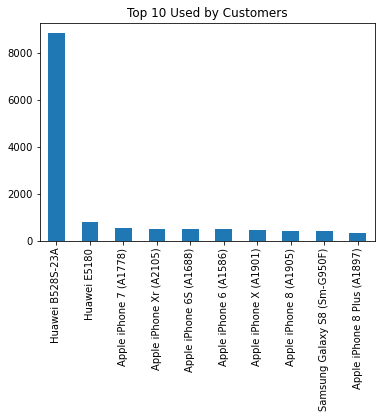

In [14]:
data.dropna()["Handset Type"].value_counts().head(10).plot(kind= "bar").set_title("Top 10 Used by Customers")

## Top 3 Handset manufacturer

* ### Including Bearer without ID

In [15]:
data["Handset Manufacturer"].value_counts().head(3)

Apple      59565
Samsung    40839
Huawei     34423
Name: Handset Manufacturer, dtype: int64

Text(0.5, 1.0, 'Top 3 Handset manufacturer')

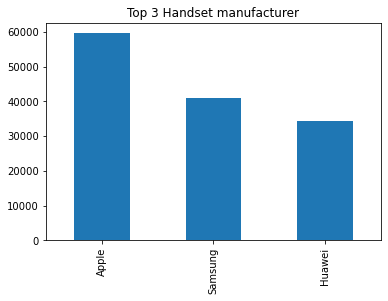

In [16]:
data["Handset Manufacturer"].value_counts().head(3).plot(kind= "bar").set_title("Top 3 Handset manufacturer")

* ### By dropping all the missing data will affect the structure of the dataset a lot

In [17]:
data.dropna()["Handset Manufacturer"].value_counts().head(3)

Huawei     10434
Apple       4362
Samsung     1984
Name: Handset Manufacturer, dtype: int64

Text(0.5, 1.0, 'Top 3 Handset manufacturer')

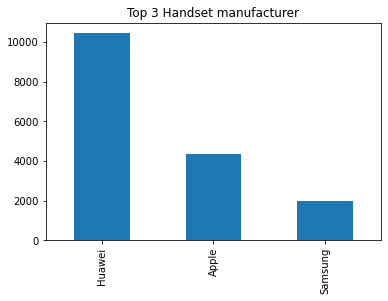

In [18]:
data.dropna()["Handset Manufacturer"].value_counts().head(3).plot(kind= "bar").set_title("Top 3 Handset manufacturer")

# The rest of the analysis will be base on customer with ID and MSISDN/Number
*Those without ID are dropped*

In [19]:
data["Bearer Id"].dropna(inplace= True)

## The Top 5 handsets per handset manufacturer

In [20]:
for manufacture in data.groupby(['Handset Manufacturer']):
    print(pd.DataFrame(manufacture[1]["Handset Type"].value_counts().head()))

                                  Handset Type
A-Link Telecom I. Cubot X18 Plus             2
A-Link Telecom I. Cubot R9                   1
A-Link Telecom I. Cubot Power                1
A-Link Telecom I. Cubot Nova                 1
A-Link Telecom I. Cubot Note S               1
                                      Handset Type
Asustek Asus Zb552Kl Zenfone Go                  7
Asustek Asus Zenfone2 Laser Ze600Kl              5
Asustek Asus Zenfone2 Laser Ze601Kl              4
Asustek Asus Zenfone 2 Laser Ze500Kl             3
Asustek Asus Zenfone Selfie Zd551Kl              2
                       Handset Type
Acer M310                         5
Acer Liquid Zest Plus             2
Acer Liquid M220                  1
Acer Liquid Zest 4G               1
Acer Liquid Z220                  1
                          Handset Type
Adar Stanley Mobile S231             1
                               Handset Type
Alif Communicati. Pulian Cm84             1
                         Hands

# Task 1.1

## Number of xDR sessions

In [21]:
xdr= pd.DataFrame(data["MSISDN/Number"].value_counts())
xdr.head(10)

,MSISDN/Number
3.362632e+10,18
3.362578e+10,17
3.361489e+10,17
3.365973e+10,16
3.367588e+10,15
3.376054e+10,15
3.366716e+10,13
3.378632e+10,12
3.376041e+10,12
3.360452e+10,12


## Session duration

In [22]:
ses_dur= data.pivot_table(index= "MSISDN/Number", values= "Dur. (ms)")
ses_dur.head(10)

,Dur. (ms)
MSISDN/Number,
3.360100e+10,116720.0
3.360100e+10,181230.0
3.360100e+10,134969.0
3.360101e+10,49878.0
3.360101e+10,18552.0
3.360101e+10,126991.5
3.360101e+10,64180.0
3.360101e+10,86399.0
3.360101e+10,247851.0


## The Total download (DL) and Upload (UL) data for each Users

In [23]:
total_dl= data.pivot_table(index= "MSISDN/Number", values= ["Total UL (Bytes)", "Total DL (Bytes)"])
total_dl.head(10)

,Total DL (Bytes),Total UL (Bytes)
MSISDN/Number,,
3.360100e+10,842637466.0,36053108.0
3.360100e+10,120755184.0,36104459.0
3.360100e+10,556659663.0,39306820.0
3.360101e+10,401993172.0,20327526.0
3.360101e+10,681565208.5,47140263.5
3.360101e+10,277603986.0,30004624.5
3.360101e+10,276520604.0,50840929.0
3.360101e+10,294085078.0,38575279.0
3.360101e+10,448280086.5,46786008.0


Text(0.5, 1.0, '10 Sample for data consumption')

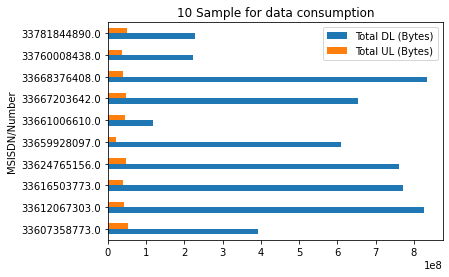

In [24]:
data.sample(10).pivot_table(index= "MSISDN/Number", values= ["Total UL (Bytes)", "Total DL (Bytes)"]).plot(kind= 'barh')
plt.title("10 Sample for data consumption")

## The total data volume (in Bytes) during this session for each application

In [25]:
d1= "Social Media DL (Bytes)	Social Media UL (Bytes)	Google DL (Bytes)	Google UL (Bytes)	Email DL (Bytes)	Email UL (Bytes)	Youtube DL (Bytes)	Youtube UL (Bytes)	Netflix DL (Bytes)	Netflix UL (Bytes)	Gaming DL (Bytes)	Gaming UL (Bytes)	Other DL (Bytes)	Other UL (Bytes)".split("	")

In [26]:
datavol= pd.DataFrame(data[d1].sum(), columns= ["Total data volume"])
datavol

,Total data volume
Social Media DL (Bytes),2.798645e+11
Social Media UL (Bytes),5.135548e+09
Google DL (Bytes),8.966716e+11
Google UL (Bytes),3.205968e+11
Email DL (Bytes),2.792363e+11
Email UL (Bytes),7.282088e+10
Youtube DL (Bytes),1.813437e+12
Youtube UL (Bytes),1.716366e+12
Netflix DL (Bytes),1.812290e+12
Netflix UL (Bytes),1.715429e+12


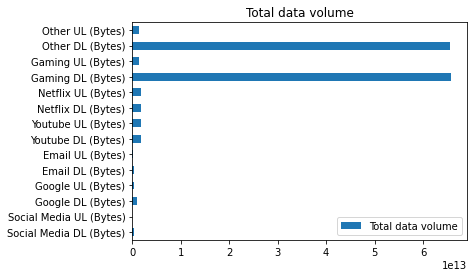

In [27]:
datavol.plot(kind= "barh")
plt.title("Total data volume")
plt.legend(loc= "lower right")

# Data summary

Number of xDR sessions,  Session duration,  the total download (DL) and upload (UL) data , the total data volume (in Bytes) during this session for each application (Social Media, Google, Email, YouTube, Netflix, Gaming).

In [28]:
dta= "Social Media DL (Bytes)	Social Media UL (Bytes)	Google DL (Bytes)	Google UL (Bytes)	Email DL (Bytes)	Email UL (Bytes)	Youtube DL (Bytes)	Youtube UL (Bytes)	Netflix DL (Bytes)	Netflix UL (Bytes)	Gaming DL (Bytes)	Gaming UL (Bytes)	Other DL (Bytes)	Other UL (Bytes)".split('	')
dta.append("Dur. (ms)")
dta.append('Total UL (Bytes)')
dta.append('Total DL (Bytes)')

In [29]:
data[dta].describe()

,Social Media DL (Bytes),Social Media UL (Bytes),Google DL (Bytes),Google UL (Bytes),Email DL (Bytes),Email UL (Bytes),Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Dur. (ms),Total UL (Bytes),Total DL (Bytes)
count,1.500020e+05,1.500020e+05,1.500020e+05,1.500020e+05,1.500020e+05,1.500020e+05,1.500020e+05,1.500020e+05,1.500020e+05,1.500020e+05,1.500020e+05,1.500020e+05,1.500020e+05,1.500020e+05,1.500000e+05,1.500000e+05,1.500010e+05
mean,1.865738e+06,3.423653e+04,5.977731e+06,2.137284e+06,1.861551e+06,4.854661e+05,1.208942e+07,1.144228e+07,1.208177e+07,1.143604e+07,4.385723e+08,8.611864e+06,4.375831e+08,8.591922e+06,1.046086e+05,4.112121e+07,4.724487e+08
std,2.729197e+07,5.069829e+05,8.797113e+07,3.129402e+07,2.706187e+07,7.012487e+06,1.764844e+08,1.677726e+08,1.763205e+08,1.683193e+08,6.405815e+09,1.253698e+08,6.388329e+09,1.267844e+08,8.103762e+04,1.127639e+07,6.900283e+09
min,1.200000e+01,0.000000e+00,2.070000e+02,3.000000e+00,1.400000e+01,2.000000e+00,5.300000e+01,1.050000e+02,4.200000e+01,3.500000e+01,2.516000e+03,5.900000e+01,3.290000e+03,1.480000e+02,7.142000e+03,2.866892e+06,7.114041e+06
25%,8.991550e+05,1.644825e+04,2.882394e+06,1.024286e+06,8.927942e+05,2.333838e+05,5.833507e+06,5.517982e+06,5.777156e+06,5.476024e+06,2.104765e+08,4.128503e+06,2.101870e+08,4.145949e+06,5.744050e+04,3.322201e+07,2.431072e+08
50%,1.794372e+06,3.292000e+04,5.765857e+06,2.054590e+06,1.793534e+06,4.662520e+05,1.161618e+07,1.101348e+07,1.164222e+07,1.099640e+07,4.234082e+08,8.291215e+06,4.218057e+08,8.267086e+06,8.639900e+04,4.114331e+07,4.558412e+08
75%,2.694940e+06,4.933400e+04,8.623632e+06,3.088455e+06,2.689332e+06,7.004445e+05,1.744860e+07,1.651565e+07,1.747056e+07,1.650733e+07,6.331756e+08,1.243164e+07,6.317015e+08,1.238430e+07,1.324302e+05,4.903424e+07,6.657068e+08
max,1.056439e+10,1.962499e+08,3.405294e+10,1.211349e+10,1.047520e+10,2.714397e+09,6.831479e+10,6.494299e+10,6.825102e+10,6.515467e+10,2.479600e+12,4.852877e+10,2.472833e+12,4.907724e+10,1.859336e+06,7.833131e+07,2.671258e+12


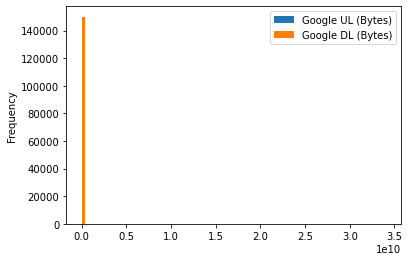

In [30]:
data[['Google UL (Bytes)', 'Google DL (Bytes)']].plot.hist(bins=100)

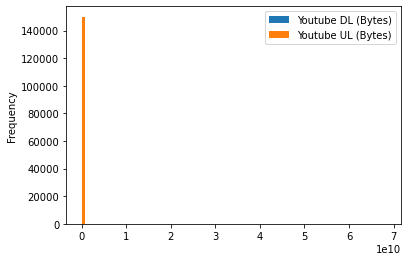

In [31]:
data[['Youtube DL (Bytes)',
 'Youtube UL (Bytes)']].plot.hist(bins= 100)

In [32]:
data['Google DL (Bytes)'].isna().sum()

0

## Data consumption

In [33]:
dta

['Social Media DL (Bytes)',
 'Social Media UL (Bytes)',
 'Google DL (Bytes)',
 'Google UL (Bytes)',
 'Email DL (Bytes)',
 'Email UL (Bytes)',
 'Youtube DL (Bytes)',
 'Youtube UL (Bytes)',
 'Netflix DL (Bytes)',
 'Netflix UL (Bytes)',
 'Gaming DL (Bytes)',
 'Gaming UL (Bytes)',
 'Other DL (Bytes)',
 'Other UL (Bytes)',
 'Dur. (ms)',
 'Total UL (Bytes)',
 'Total DL (Bytes)']

Text(0.5, 1.0, '10 Sample for data consumption')

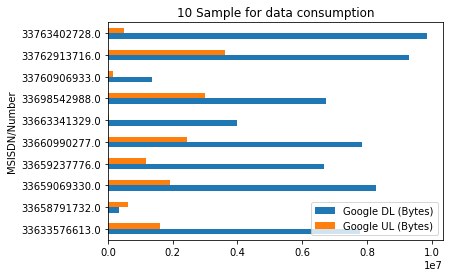

In [34]:
data.sample(10).pivot_table(index= "MSISDN/Number", values= ['Google DL (Bytes)',
 'Google UL (Bytes)']).plot(kind= 'barh')
plt.title("10 Sample for data consumption")

Text(0.5, 1.0, '10 Sample for data consumption')

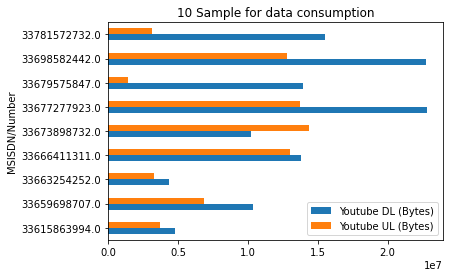

In [35]:
 data.sample(10).pivot_table(index= "MSISDN/Number", values= ['Youtube DL (Bytes)',
 'Youtube UL (Bytes)']).plot(kind= 'barh')
plt.title("10 Sample for data consumption")

Text(0.5, 1.0, '10 Sample for data consumption')

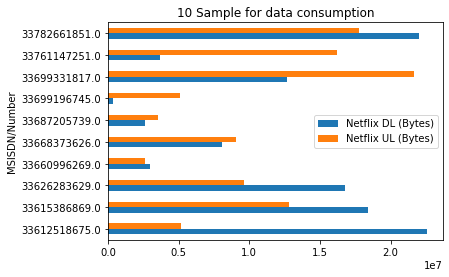

In [36]:
data.sample(10).pivot_table(index= "MSISDN/Number", values= [ 'Netflix DL (Bytes)',
 'Netflix UL (Bytes)']).plot(kind= 'barh')
plt.title("10 Sample for data consumption")

Text(0.5, 1.0, 'Data consumption on Gaming DL')

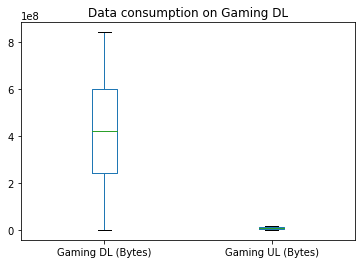

In [37]:
data.pivot_table(index= "MSISDN/Number", values= ['Gaming DL (Bytes)',
'Gaming UL (Bytes)']).plot(kind= 'box')
plt.title("Data consumption on Gaming DL")

Text(0.5, 1.0, 'Data consumption on Netflix')

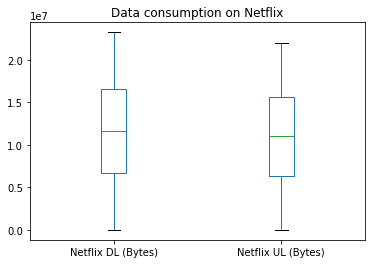

In [38]:
data.pivot_table(index= "MSISDN/Number", values= [ 'Netflix DL (Bytes)',
 'Netflix UL (Bytes)']).plot(kind= 'box')
plt.title("Data consumption on Netflix")

Text(0.5, 1.0, 'Data consumption on Google Dl')

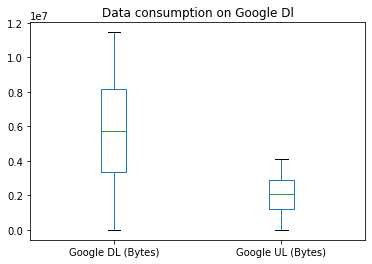

In [39]:
data.pivot_table(index= "MSISDN/Number", values= [ 'Google DL (Bytes)',
 'Google UL (Bytes)']).plot(kind= 'box')
plt.title("Data consumption on Google Dl")

# Task 2

## Sessions frequency